In [1]:
import numpy as np
import matplotlib.pyplot as plt

When looking at the current in the RLC circuit, the equations we use to determine how the current varies over time depend on wether the system is Over Damped, Critically Damped or under Damped.

To understand what value of $\zeta $ a system has, we first look at two related values derived from the RLC circuit parameters, that when combined allow us to calculate damping factor:

### Neper Frequency

The Neper Frequency, or exponential transience rate, tells us how quickly energy is lost from our system.

$\Huge \alpha = \frac{R}{2L} $

### Resonant angular frequency

The resonant frequency tells us what frequency a system will tend to oscillate at.

$\Huge \omega_{o} = \frac{1}{\sqrt{LC}}$

Then we combine these two factors to calculate the damping factor, and which of a set of three equations we should use to model the behavior.

### Damping Factor
$\Huge \zeta = \frac{\alpha}{\omega_{o}}$

We use $\zeta $ to indidcate the damping factor and find the following values associated with each set of behaviour:

Over Damped:
$\zeta  \gt 1$ 

Critically Damped:
$\zeta  = 1$

Under Damped:
$\zeta  \lt 1$

### Case 1: Overdamped current response

Over Damped:
$\zeta  \gt 1$

$\Huge i(t)=\frac{V}{L(s_{1}-s_{2})}e^{s_{1}t} -\frac{V}{L(s_{1}-s_{2})}e^{s_{2}t}$

where $s_{1,2}=-\alpha\pm\sqrt{\alpha^2 - \omega_{0}^2}$

In [2]:
def s_1(alpha, omega):
    return - alpha + np.sqrt(alpha**2 -omega**2)

In [3]:
def s_2(alpha, omega):
    return - alpha - np.sqrt(alpha**2 -omega**2)

In [4]:
def overdamped(t, V, L, s1, s2):
    return V*( np.exp(s1*t) - np.exp(s2*t) )/(L*(s1-s2))

In [5]:
def overdamped_capacitance(C):
    R = 200
    L = 5e-3
    V = 10
    alpha = R/(2*L)
    omega = 1/np.sqrt(L*C)
    zeta = alpha/omega
    s1 = s_1(alpha, omega)
    s2 = s_2(alpha, omega)
    t = np.linspace(0, 2, 1000)
    overdamped1 = overdamped(t/1000, V, L, s1, s2)*1000
    fig, ax = plt.subplots()
    ax.plot(t, overdamped1, label= "overdamped, C= " + str(C*1E6) + "$\mu $F, L=" + str(1000*L) + "mH, R =" + str(R) + "$\Omega $,   $ \zeta $ = " + str(zeta))
    ax.legend(loc= 'upper right')
    plt.title("Current over time for an overdamped RLC circuit")
    plt.xlabel("t (ms)")
    plt.ylabel("current (mA)")
    plt.show()

To see an overdamped response we can set C to 2.0 $\mu$F, L to 5.0mH and R to 200$\Omega$

Note a reduced peak amplitude compared to the critically damped case we look at next

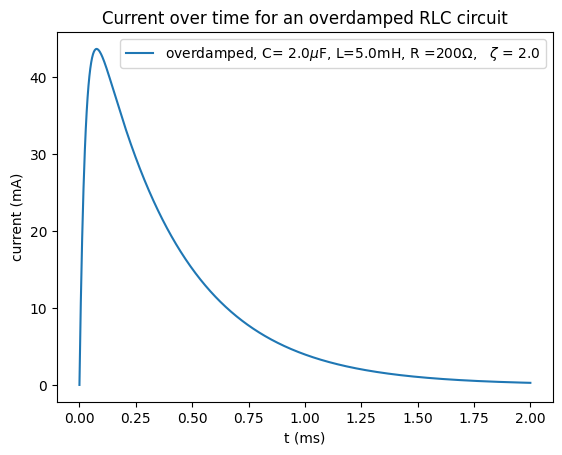

In [6]:
overdamped_capacitance(2e-6)

### Case 2: Critically Damped Current Response

Critically Damped:
$\zeta  = 1$

$\Huge i(t) = \frac{V}{L}te^{-\alpha t}$

In [7]:
def critical(t, V, L, alpha):
    return (V/L)*t*np.exp(-alpha * t)

In [8]:
def critical_capacitance(C):
    V = 10
    L = 5e-3
    R = 2*np.sqrt(L/C)
    alpha = R/(2*L)
    omega = 1/np.sqrt(L*C)
    zeta = alpha/omega
    print(zeta)
    t = np.linspace(0, 2, 1000)
    critical1 = critical(t/1000, V, L, alpha)*1000
    fig, ax = plt.subplots()
    ax.plot(t, critical1, label= "critically damped, C= " + str(C*1E6) + "$\mu $F, L=" + str(1000*L) + "mH, R =" + str(R) + "$\Omega $,   $ \zeta $ = " + str(zeta))
    ax.legend(loc= 'upper right')
    plt.title("Current over time for critically damped RLC circuit")
    plt.xlabel("t (ms)")
    plt.ylabel("current (mA)")
    plt.show()

To see an critically damped response we keep C and L the same and set R to 100$\Omega$

Compare the peak with the over damped case above.

1.0


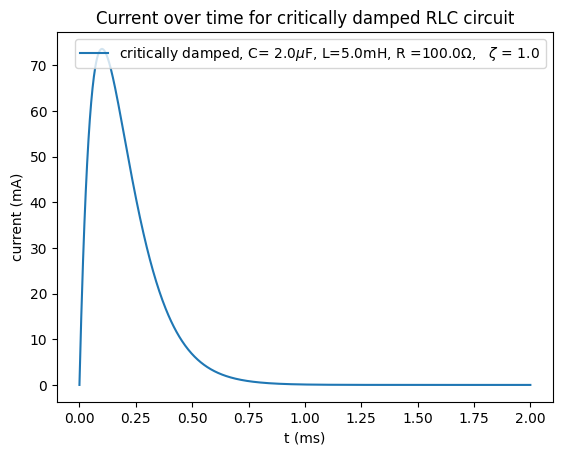

In [9]:
critical_capacitance(2e-6)

### Case 3: Under damped response

Under Damped:
$\zeta  \lt 1$

$\Huge i(t)=\frac{V}{L\sqrt{\omega_{o}^2 - \alpha^2}}e^{-\alpha t}sin(\sqrt{\omega_{o}^2 - \alpha^2}t)$

In [10]:
def under(t, V, L, omega, alpha):
    return V*np.exp(-alpha*t)*np.sin(np.sqrt(omega**2 - alpha**2)*t)/(L*np.sqrt(omega**2 - alpha**2))

In [11]:
def under_capacitance(C):
    V = 10
    L = 5e-3
    R = 50
    alpha = R/(2*L)
    omega1 = 1/np.sqrt(L*C)
    zeta1 = alpha/omega1
    print(zeta1)
    t = np.linspace(0, 2, 1000)
    under1 = under(t/1000, V, L, omega1, alpha)*1000
    fig, ax = plt.subplots()
    ax.plot(t, under1, label= "under damped, C= " + str(C*1E6) + "$\mu $F, L=" + str(1000*L) + "mH, R =" + str(R) + "$\Omega $,   $ \zeta $ = " + str(zeta1))
    ax.legend(loc= 'upper right')
    plt.title("Current over time for underdamped RLC circuit")
    plt.xlabel("t (ms)")
    plt.ylabel("current (mA)")
    plt.show()

To see an critically damped response we keep C and L the same and set R to 50$\Omega$

Now we see the beginning of oscillations, with peaks decaying over time.

0.5


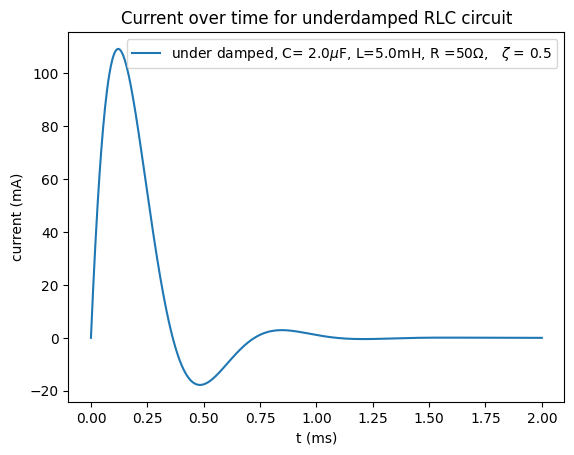

In [12]:
under_capacitance(2e-6)

Let's see what happens if we drop R down to 10 Ohms

In [13]:
def under_capacitance(C):
    V = 10
    L = 5e-3
    R = 10
    alpha = R/(2*L)
    omega1 = 1/np.sqrt(L*C)
    zeta1 = alpha/omega1
    print(zeta1)
    t = np.linspace(0, 2, 1000)
    under1 = under(t/1000, V, L, omega1, alpha)*1000
    fig, ax = plt.subplots()
    ax.plot(t, under1, label= "under damped, C= " + str(C*1E6) + "$\mu $F, L=" + str(1000*L) + "mH, R =" + str(R) + "$\Omega $,   $ \zeta $ = " + str(zeta1))
    ax.legend(loc= 'upper right')
    plt.title("Current over time for underdamped RLC circuit")
    plt.xlabel("t (ms)")
    plt.ylabel("current (mA)")
    plt.show()

0.1


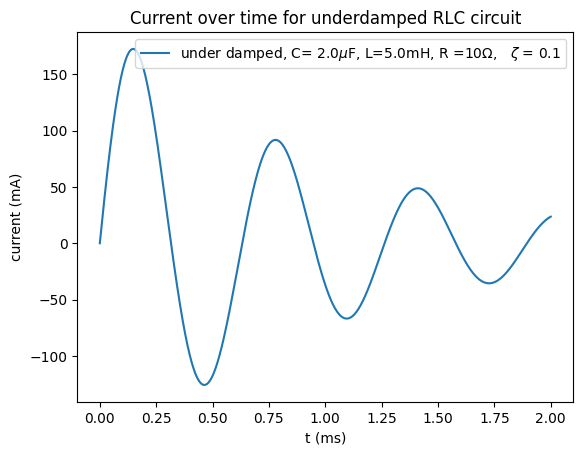

In [14]:
under_capacitance(2e-6)

We can compare the four responses on a single plot:

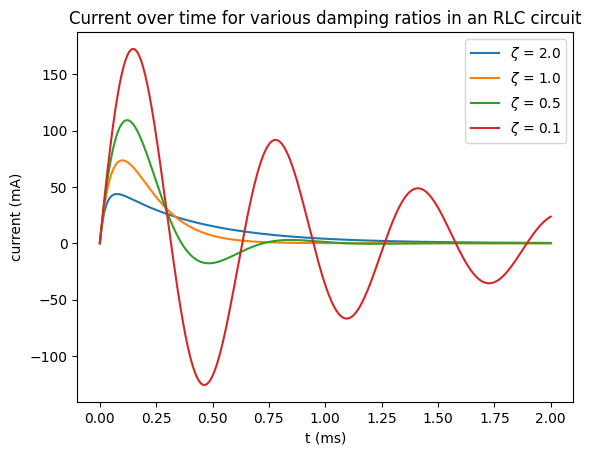

In [15]:
# Overdamped
C = 2e-6
R = 200
L = 5e-3
V = 10
alpha = R/(2*L)
omega = 1/np.sqrt(L*C)
s1 = s_1(alpha, omega)
s2 = s_2(alpha, omega)
t = np.linspace(0, 2, 1000)
overdamped1 = overdamped(t/1000, V, L, s1, s2)*1000
overdamped_zeta = alpha/omega

# Critically Damped
C = 2e-6
R = 100
L = 5e-3
V = 10
alpha = R/(2*L)
omega = 1/np.sqrt(L*C)
critical1 = critical(t/1000, V, L, alpha)*1000
critical_zeta = alpha/omega

# Underdamped
C = 2e-6
R = 50
L = 5e-3
V = 10
alpha = R/(2*L)
omega = 1/np.sqrt(L*C)
under1 = under(t/1000, V, L, omega, alpha)*1000
under_zeta = alpha/omega

# Underdamped2
C = 2e-6
R = 10
L = 5e-3
V = 10
alpha = R/(2*L)
omega = 1/np.sqrt(L*C)
under2 = under(t/1000, V, L, omega, alpha)*1000
under_zeta2 = alpha/omega

# Plotting
fig, ax = plt.subplots()
ax.plot(t, overdamped1, label= "$ \zeta $ = " + str(overdamped_zeta))
ax.plot(t, critical1, label= "$ \zeta $ = " + str(critical_zeta))
ax.plot(t, under1, label= "$ \zeta $ = " + str(under_zeta))
ax.plot(t, under2, label= "$ \zeta $ = " + str(under_zeta2))
ax.legend(loc= 'upper right')
plt.title("Current over time for various damping ratios in an RLC circuit")
plt.xlabel("t (ms)")
plt.ylabel("current (mA)")
plt.show()

We want to see what happens if we change capacitance, but first we should check to see how changing C impacts the value for $\zeta$, and hence the solution to use in the model:

In [16]:
def sigma(C, L, R):
    return (R/2)*np.sqrt(C/L)

In [17]:
C = 2e-6
R = 200
L = 5e-3
V = 10

In [18]:
sigma(C,L, R)

2.0

In [19]:
C = 1e-6
R = 200
L = 5e-3
V = 10

In [20]:
sigma(C,L, R)

1.4142135623730951

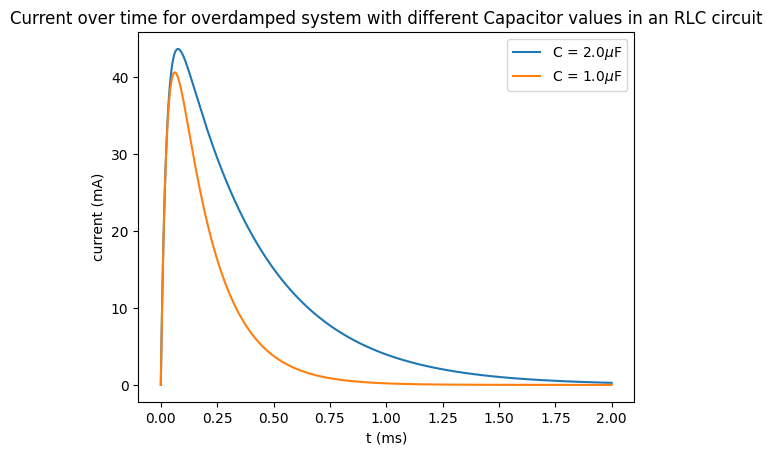

In [21]:
# Overdamped1
C1 = 2e-6
R = 200
L = 5e-3
V = 10
alpha = R/(2*L)
omega = 1/np.sqrt(L*C1)
s1 = s_1(alpha, omega)
s2 = s_2(alpha, omega)
t = np.linspace(0, 2, 1000)
overdamped1 = overdamped(t/1000, V, L, s1, s2)*1000
overdamped_zeta1 = alpha/omega

# Overdamped2
C2 = 1e-6
R = 200
L = 5e-3
V = 10
alpha = R/(2*L)
omega = 1/np.sqrt(L*C2)
s1 = s_1(alpha, omega)
s2 = s_2(alpha, omega)
t = np.linspace(0, 2, 1000)
overdamped2 = overdamped(t/1000, V, L, s1, s2)*1000
overdamped_zeta2 = alpha/omega

# Plotting
fig, ax = plt.subplots()
ax.plot(t, overdamped1, label= "C = " + str(C1*1e6) + "$\mu$F" )
ax.plot(t, overdamped2, label= "C = " + str(C2*1e6) + "$\mu$F")

ax.legend(loc= 'upper right')
plt.title("Current over time for overdamped system with different Capacitor values in an RLC circuit")
plt.xlabel("t (ms)")
plt.ylabel("current (mA)")
plt.show()